In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-03-04 13:50:22--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.003s  

2023-03-04 13:50:22 (14.5 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Some code is commented beacuse the operation is already done, and if it´s run again, it returns a traceback.

#Cleaning the data

In [ ]:
# Removing string categorical varibales

df_dummies = pd.get_dummies(dataset[["sex", "smoker", "region"]])
#df_dummies.head()

In [ ]:
dataset.drop(["sex", "smoker", "region"], axis = 1, inplace = True) 
dataset = dataset.join(df_dummies)

dataset.isna().sum()


age                 0
bmi                 0
children            0
expenses            0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
dataset.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


#Preparing the data

In [ ]:
train_dataset = dataset.sample(frac = 0.8)
test_dataset = dataset[~dataset.isin(train_dataset)].dropna()
print(len(train_dataset), len(test_dataset))
train_dataset.head()

1070 268


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1163,18,28.2,0,2200.83,1,0,1,0,1,0,0,0
257,38,40.2,0,5400.98,1,0,1,0,0,0,1,0
32,19,28.6,5,4687.80,1,0,1,0,0,0,0,1
536,33,38.9,3,5972.38,1,0,1,0,0,0,0,1
905,26,29.4,2,4564.19,1,0,1,0,1,0,0,0


In [ ]:

train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")
test_dataset.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
13,56.0,39.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15,19.0,24.6,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
28,23.0,17.4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
33,63.0,28.3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
52,48.0,28.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([normalizer, layers.Dense(16), layers.Dense(4), 
                          layers.Dropout(0.2), layers.Dense(1)])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), 
              loss="mae", metrics=["mae", "mse"])
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 288
Trainable params: 265
Non-trainable params: 23
_________________________________________________________

In [ ]:
history = model.fit(train_dataset, train_labels, epochs = 100, 
                    validation_split = 0.5, verbose = 0)

9/9 - 0s - loss: 4051.5457 - mae: 4051.5457 - mse: 43478476.0000 - 50ms/epoch - 6ms/step
Testing set Mean Abs Error: 4051.55 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 3ms/step


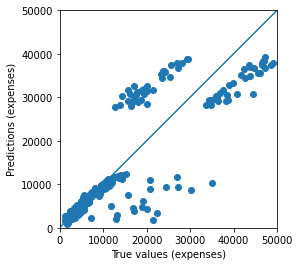

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
